**Presentado por: 
Santiago Ramirez Salazar - 
Sergio Andres Mora - 
Camilo Andres Cardenas**

En este notebook se realizará el procedimiento para hacer una regresión lineal a una base de datos llamada "Cellphone". En esta base de datos se presentan diferentes variables como los precios de diferentes celulares, la densidad de pixeles del telefono, la frecuencia del procesador, entre otras.




Para empezar se hace uso de librerias como pandas para obtener la base de datos anteriormente mencionada que se puede descargar desde https://www.kaggle.com/datasets/mohannapd/mobile-price-prediction?resource=download 

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Cellphone.csv')
del df['Product_id']
del df['cpu core']
del df['ram']
del df['Front_Cam']
df.head()

,Price,Sale,weight,resoloution,ppi,cpu freq,internal mem,RearCam,battery,thickness
0,2357,10,135.0,5.2,424,1.35,16.0,13.00,2610,7.4
1,1749,10,125.0,4.0,233,1.30,4.0,3.15,1700,9.9
2,1916,10,110.0,4.7,312,1.20,8.0,13.00,2000,7.6
3,1315,11,118.5,4.0,233,1.30,4.0,3.15,1400,11.0
4,1749,11,125.0,4.0,233,1.30,4.0,3.15,1700,9.9


Haciendo uso de la libreria seaborn y de matplotlib se realiza un diagrama de dispersión de los datos con la intención de observar la relación entre algunas de las variabls que hacen parte de la base de datos

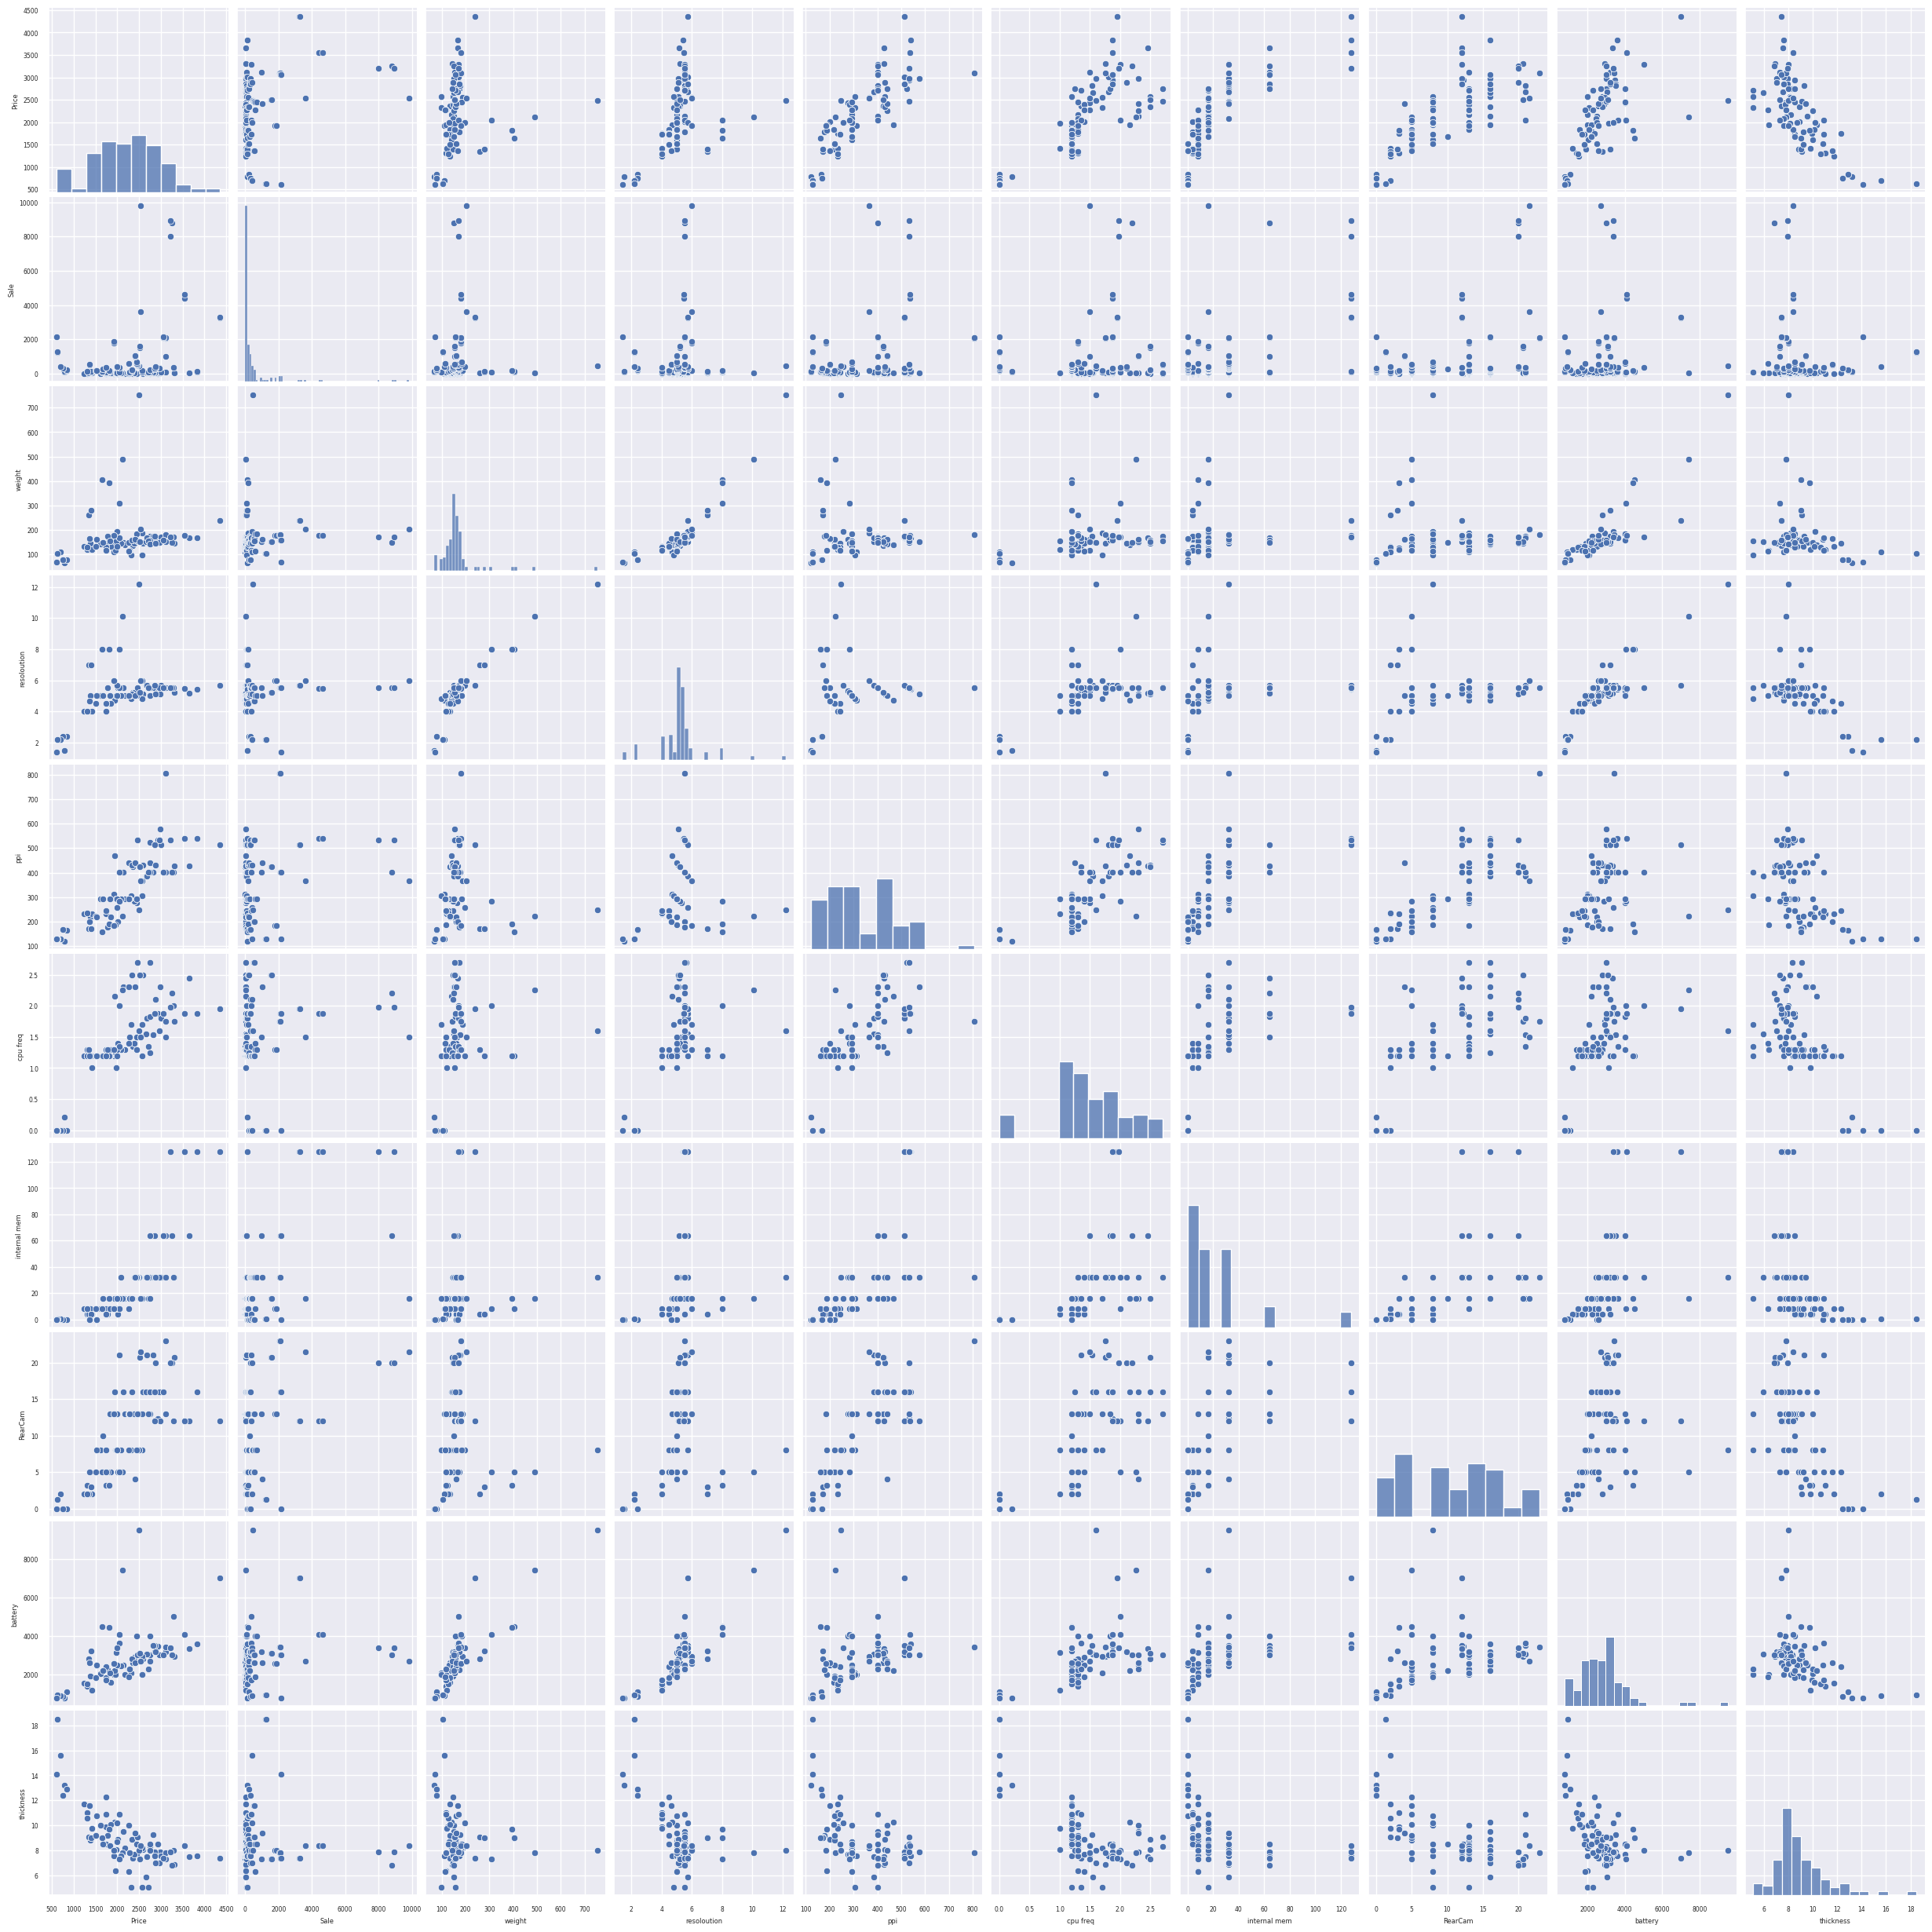

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.pairplot(df, height=2.5)
plt.show()

Es importante conocer como se pueden relacionar las variables de la base de datos, a partir del mapa de calor que a su vez permite obtener la correlación entre pares de variables. Para esto se hace uso de numpy y de seaborn.

<Axes: >

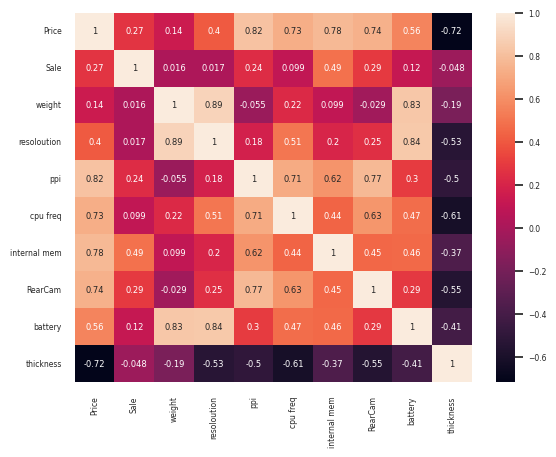

In [ ]:
import numpy as np
cols=df.columns
cm = np.corrcoef(df.values.T)
sns.set(font_scale=0.5)
sns.heatmap(cm, cbar=True, annot=True,yticklabels=cols,xticklabels=cols)

A partir de ahora se realiza una regresión lineal a pedal apoyandose en la libreria sklearn para relacionar diferentes variables con respecto al precio de los celulares. Esta primera regresión es establecida para las variables *ppi* y *Price*, lo que basicamente permitira observar la relación entre el precio de el celular con respecto a la densidad de pixeles.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = df['ppi'].values.reshape(-1, 1)
y = df['Price'].values.reshape(-1, 1)

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(X_std, y_std)

LinearRegression()

La información encontrada se presenta de forma grafica para analizar como se relacionan las variables estudiadas y tomar decisiones a partir de la misma, por lo cual se observa una a una las graficas de dispersión obtenidas para las variables evaluadas

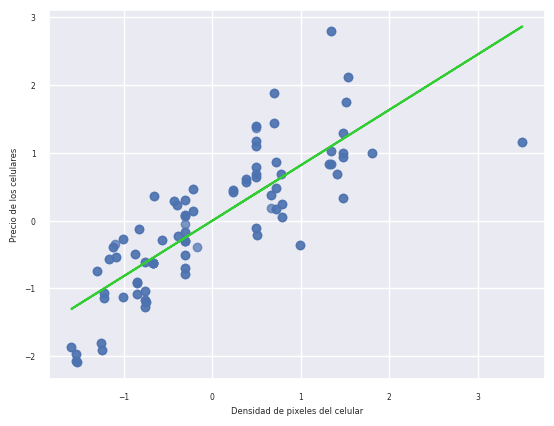

In [ ]:
plt.scatter(X_std,y_std,alpha=0.7)
plt.plot(X_std,slr.predict(X_std), color='limegreen')
plt.ylabel("Precio de los celulares")
plt.xlabel("Densidad de pixeles del celular")
plt.show()

La siguiente regresión es establecida para las variables *battery* y *Price*, lo que permitira observar la relación entre el precio de el celular con respecto al grosor del mismo.

In [ ]:
X = df['battery'].values.reshape(-1, 1)
y = df['Price'].values.reshape(-1, 1)

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(X_std, y_std)

LinearRegression()

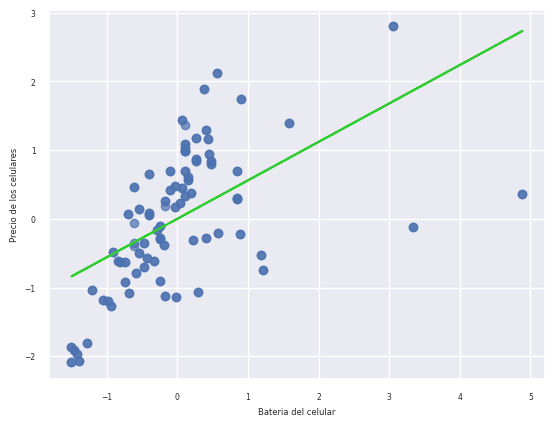

In [ ]:
plt.scatter(X_std,y_std,alpha=0.7)
plt.plot(X_std,slr.predict(X_std), color='limegreen')
plt.ylabel("Precio de los celulares")
plt.xlabel("Bateria del celular")
plt.show()

Por último, esta tercera regresión es establecida para las variables *thickness* y *Price*, lo que permitira observar la relación entre el precio de el celular con respecto al grosor del mismo.

In [ ]:
X = df['thickness'].values.reshape(-1, 1)
y = df['Price'].values.reshape(-1, 1)

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(X_std, y_std)

LinearRegression()

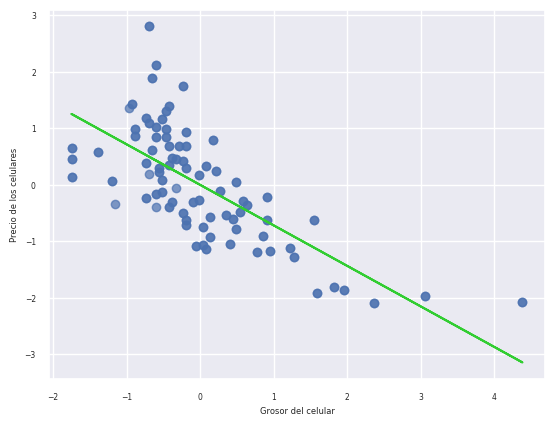

In [ ]:
plt.scatter(X_std,y_std,alpha=0.7)
plt.plot(X_std,slr.predict(X_std), color='limegreen')
plt.ylabel("Precio de los celulares")
plt.xlabel("Grosor del celular")
plt.show()

Por otra parte, es importante obervar la relación mostrada entre diferentes variables con respecto al precio a partir de una gráfica de dispersión multivariadasobre la que se evaluan las variables *battery*,  *ppi* y *thickness* que represntan, la bateria del telefono, la densidad de pixeles en la pantalla y el grosor del mismo respectivamente.

In [ ]:
X = df[['battery', 'ppi', 'thickness']].values
y = df[['Price', 'Price', 'Price']].values

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(X_std, y_std)

LinearRegression()

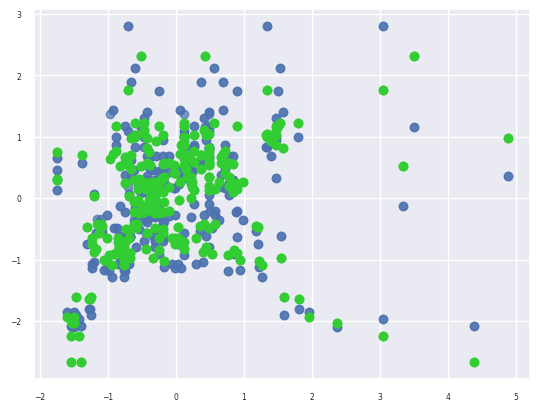

In [ ]:
plt.scatter(X_std,y_std,alpha=0.7)
plt.scatter(X_std,slr.predict(X_std), color='limegreen')
plt.show()

Finalmente, haciendo uso de la función predict se busca determinar el precio especifico de una telefono a partir de  algunas caracteristicas.

In [ ]:
caracteristicas = [1.5, 400, 8]
caracteristicas_std = sc_x.transform(np.array([caracteristicas]))
print("El precio de un celular con estas caracteristicaas es ", sc_y.inverse_transform(slr.predict(caracteristicas_std)))

El precio de un celular con estas caracteristicaas es  [[2136.03624476 2136.03624476 2136.03624476]]


Por ultimo, se desarrolla una red neuronal que permita entrenar los datos, lo cual se realiza a partir de la libreria keras y con una estructura de 5 capas buscando un mejor resultado.

In [ ]:
from keras import layers, models, optimizers
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Definir los datos
X = df['battery'].values.reshape(-1, 1)
y = df['Price'].values.reshape(-1, 1)

# Definir los parámetros del modelo
num_folds = 5
num_epochs = 200
batch_size = 16
learning_rate = 0.07

# Definir el modelo
model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(1,1)))
model.add(layers.Dense(64))
model.add(layers.Dense(32))
model.add(layers.Dense(16))
model.add(layers.Dense(1))

# Compilar el modelo
model.compile(optimizer=optimizers.Adam(lr=learning_rate),loss="mae",metrics=["mae"])

# Definir los k-folds
kf = KFold(n_splits=num_folds, shuffle=True)

# Inicializar los resultados
all_mae_histories = []


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# Realizar la validación cruzada k-fold
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Entrenar el modelo
    history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, verbose=0, validation_data=(X_val, y_val))

    # Guardar la historia del error absoluto medio (MAE) durante el entrenamiento
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

# Calcular el promedio del error absoluto medio en cada epoch
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

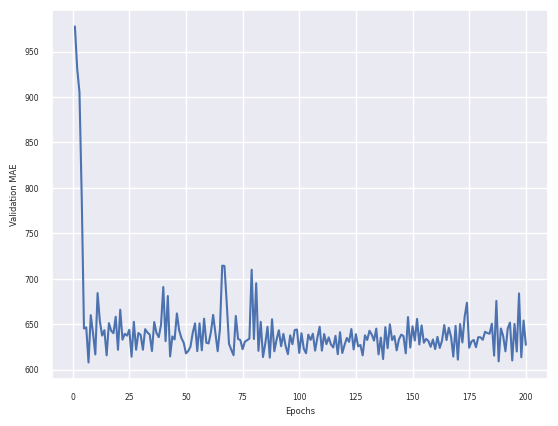

In [ ]:
# Graficar el error absoluto medio en función del epoch
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
loss, mae = model.evaluate(X_val, y_val, verbose=0)
print('Validation MAE:', mae)

Validation MAE: 680.7432861328125
